In [12]:
import pandas as pd
df = pd.read_csv("/home/ashken.edirisinghe/Downloads/Kubernets9_cluster_data.csv")

In [14]:
# Clean column names (remove spaces, make lowercase)
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
df.head()


,cluster_id,team,deployment,chart_name,cpu_used,memory_used_(gb),storage_used_(gb),cpu_allocated,memory_allocated_(gb),storage_allocated_(gb),deployment_count
0,1,DE,1,Yugabyte,6816,16.63,267,75000,150,2000,4
1,1,DE,1,Openebs,4409,16.09,192,75000,150,2000,7
2,1,DE,1,Timescaledb,4250,6.37,121,75000,150,2000,9
3,1,DE,1,Restic,10654,19.26,148,75000,150,2000,5
4,1,DE,1,Cassandra,3868,13.91,147,75000,150,2000,2


In [15]:
# Strip extra spaces in string columns
df['chart_name'] = df['chart_name'].str.strip()
df['team'] = df['team'].str.strip()


In [16]:
df.dropna(inplace=True)

In [17]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_count = duplicate_rows.shape[0]

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Output: number of duplicates removed, original row count, cleaned row count
duplicate_count, df.shape[0], df_cleaned.shape[0]

(0, 4956, 4956)

In [ ]:
# Check for missing values
missing_summary = df.isnull().sum()

missing_summary[missing_summary > 0]


Series([], dtype: int64)

In [18]:
# Strip extra spaces in string columns
df['chart_name'] = df['chart_name'].str.strip()
df['team'] = df['team'].str.strip()


In [19]:
# Filter out invalid resource allocations
df = df[
    (df['cpu_allocated'] > 0) &
    (df['memory_allocated_(gb)'] > 0) &
    (df['storage_allocated_(gb)'] > 0)
]


In [20]:
# Filter out impossible usage values
df= df[
    (df['cpu_used'] >= 0) &
    (df['memory_used_(gb)'] >= 0) &
    (df['storage_used_(gb)'] >= 0)
]


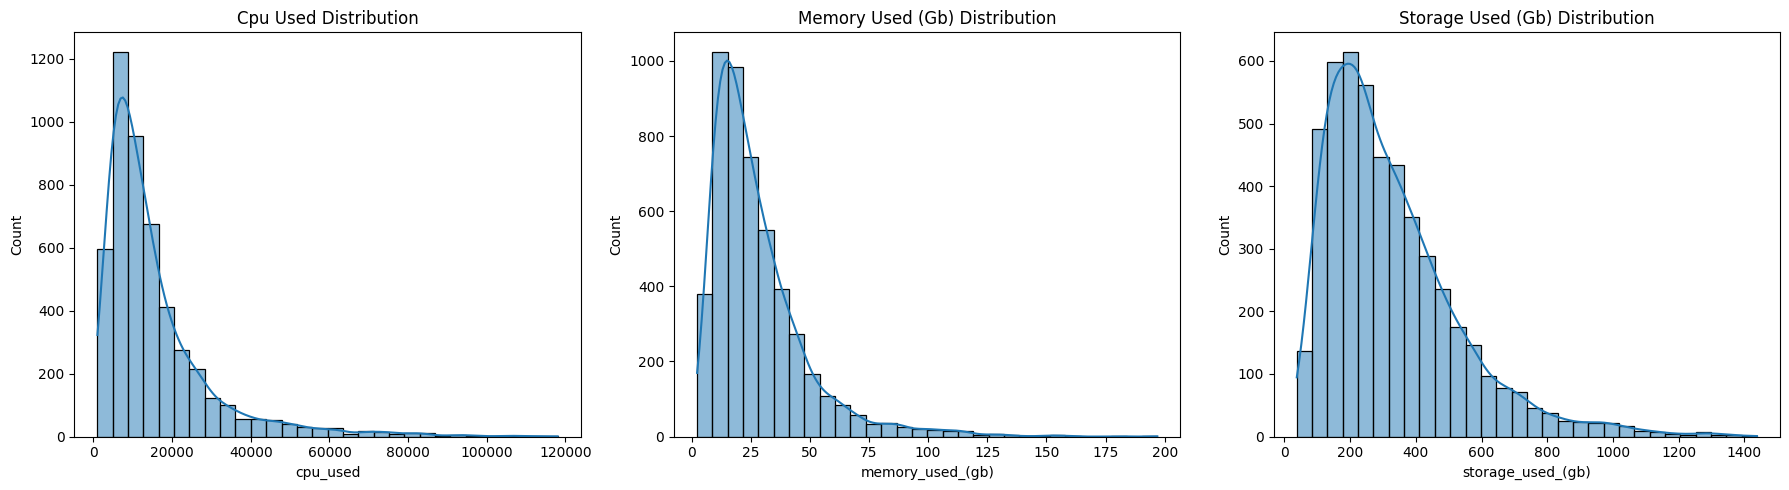

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))
features = ['cpu_used', 'memory_used_(gb)', 'storage_used_(gb)']

for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col.replace('_', ' ').title()} Distribution")

plt.tight_layout()
plt.show()


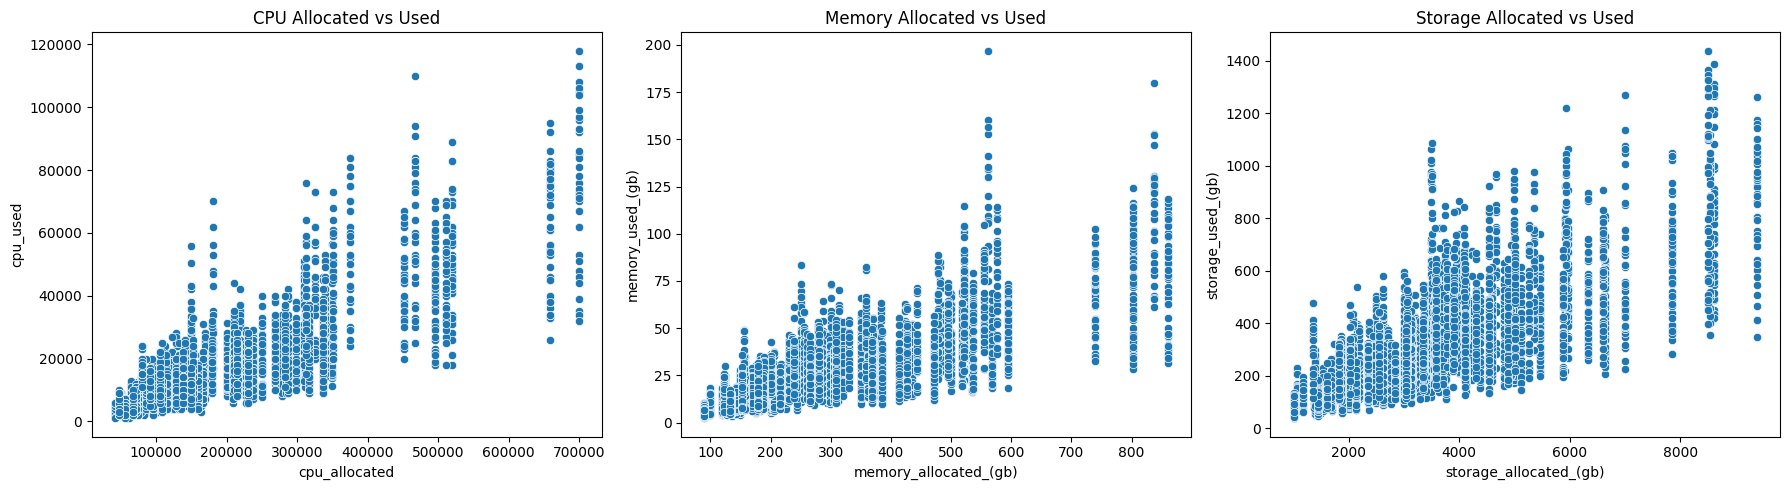

In [22]:
plt.figure(figsize=(18, 5))

# CPU
plt.subplot(1, 3, 1)
sns.scatterplot(x='cpu_allocated', y='cpu_used', data=df)
plt.title("CPU Allocated vs Used")

# Memory
plt.subplot(1, 3, 2)
sns.scatterplot(x='memory_allocated_(gb)', y='memory_used_(gb)', data=df)
plt.title("Memory Allocated vs Used")

# Storage
plt.subplot(1, 3, 3)
sns.scatterplot(x='storage_allocated_(gb)', y='storage_used_(gb)', data=df)
plt.title("Storage Allocated vs Used")

plt.tight_layout()
plt.show()


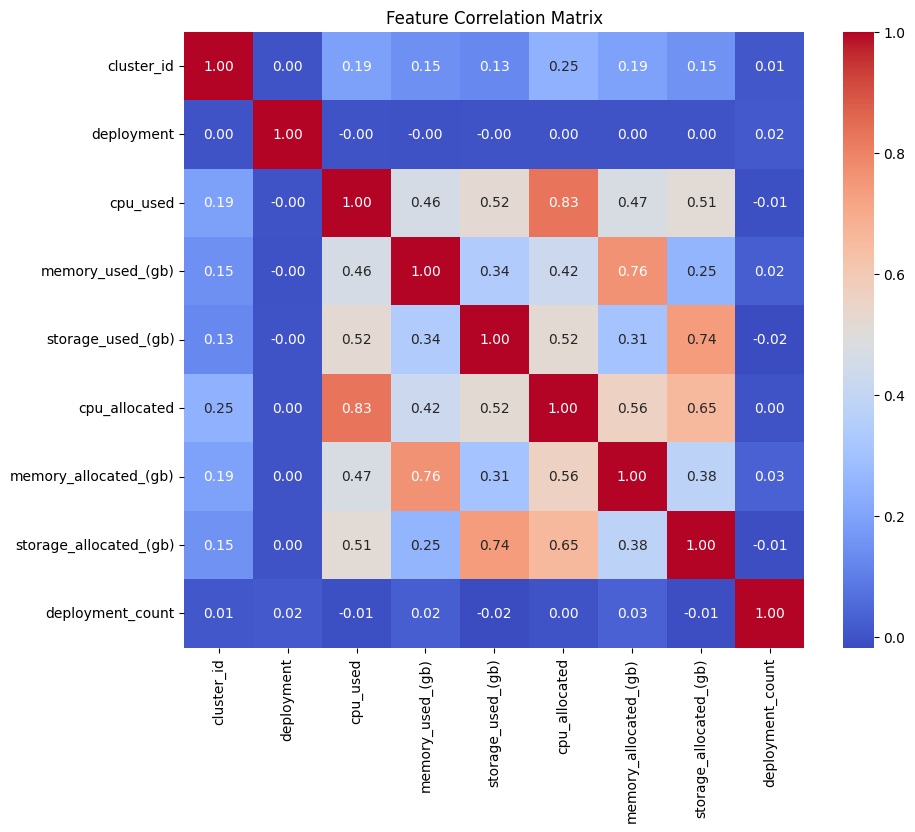

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


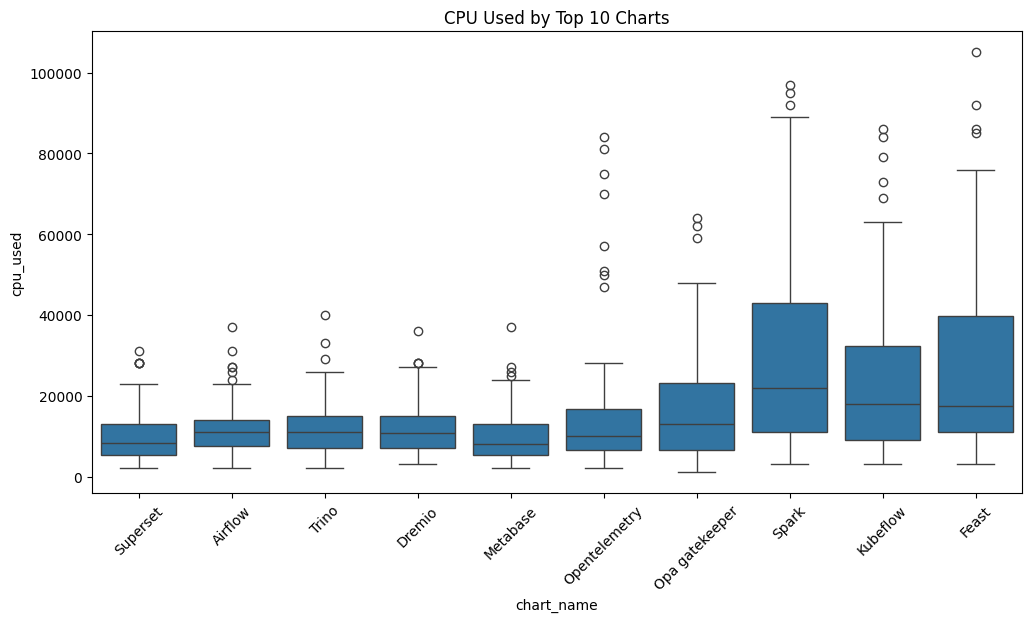

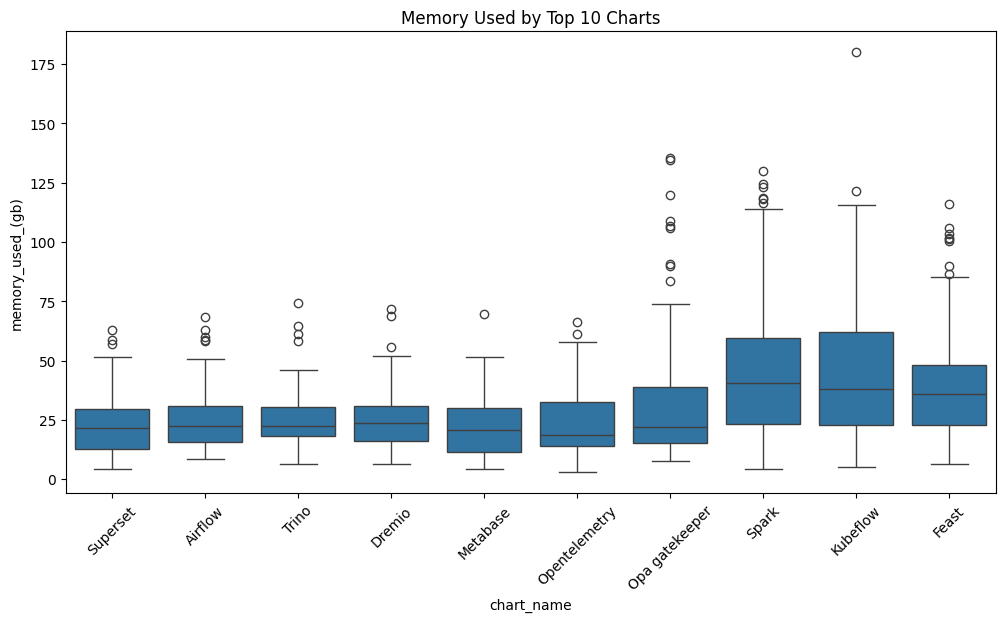

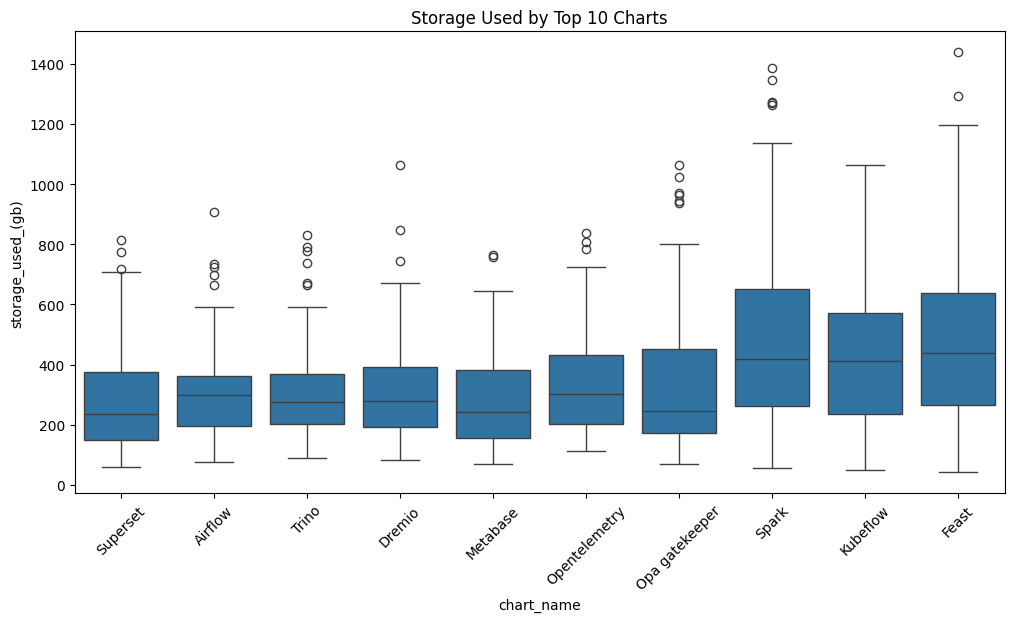

In [24]:
# Filter top 10 chart names
top_charts = df['chart_name'].value_counts().head(10).index
subset = df[df['chart_name'].isin(top_charts)]

# CPU Usage by Chart
plt.figure(figsize=(12, 6))
sns.boxplot(x='chart_name', y='cpu_used', data=subset)
plt.xticks(rotation=45)
plt.title("CPU Used by Top 10 Charts")
plt.show()

# Memory Usage by Chart
plt.figure(figsize=(12, 6))
sns.boxplot(x='chart_name', y='memory_used_(gb)', data=subset)
plt.xticks(rotation=45)
plt.title("Memory Used by Top 10 Charts")
plt.show()

# Storage Usage by Chart
plt.figure(figsize=(12, 6))
sns.boxplot(x='chart_name', y='storage_used_(gb)', data=subset)
plt.xticks(rotation=45)
plt.title("Storage Used by Top 10 Charts")
plt.show()


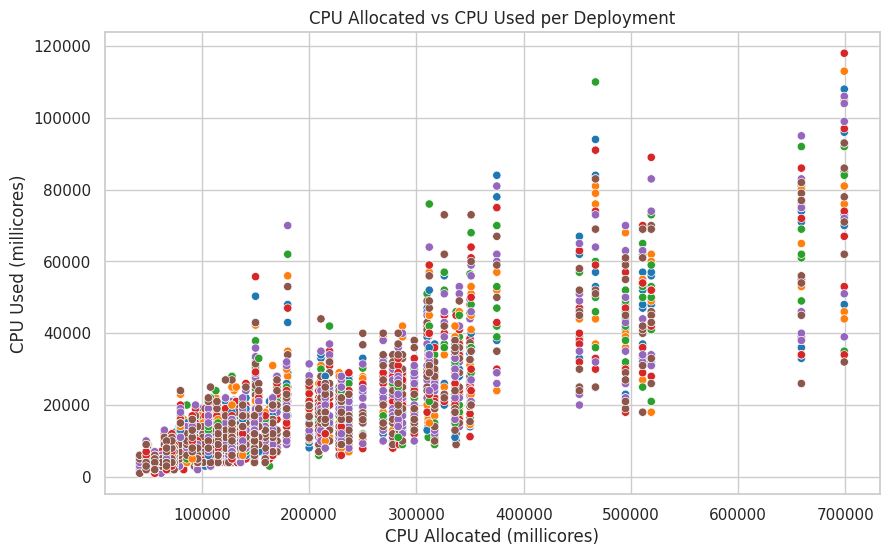

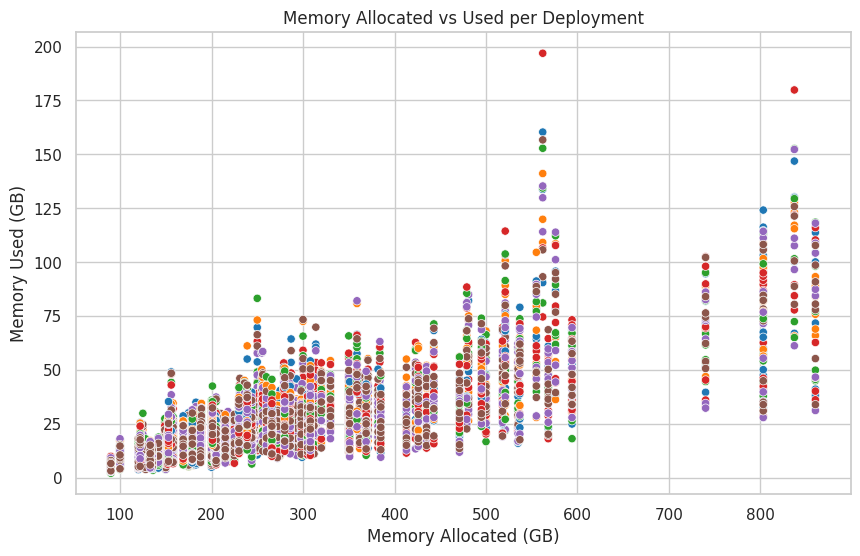

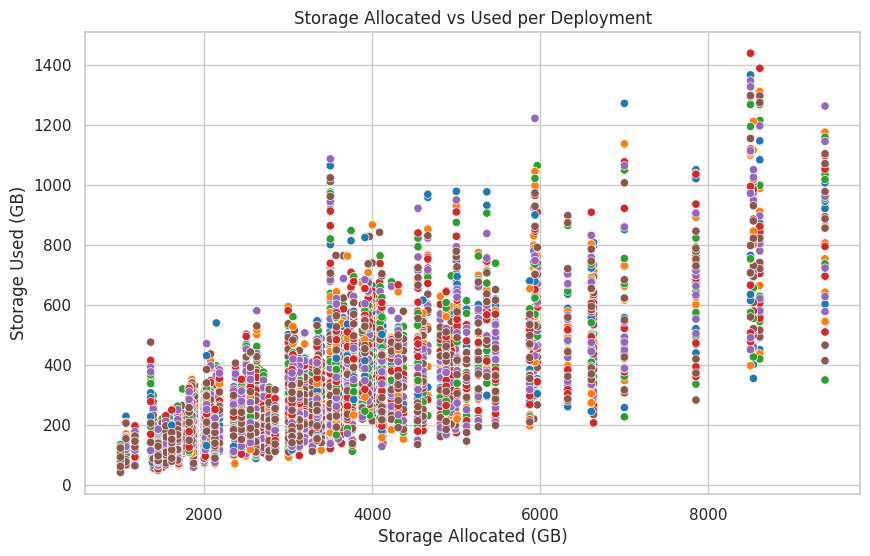

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. CPU Allocated vs CPU Used for each deployment
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cpu_allocated', y='cpu_used', hue='deployment', palette='tab10', legend=False)
plt.title("CPU Allocated vs CPU Used per Deployment")
plt.xlabel("CPU Allocated (millicores)")
plt.ylabel("CPU Used (millicores)")
plt.show()

# 2. Memory Allocated vs Used per Deployment
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='memory_allocated_(gb)', y='memory_used_(gb)', hue='deployment', palette='tab10', legend=False)
plt.title("Memory Allocated vs Used per Deployment")
plt.xlabel("Memory Allocated (GB)")
plt.ylabel("Memory Used (GB)")
plt.show()

# 3. Storage Allocated vs Used per Deployment
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='storage_allocated_(gb)', y='storage_used_(gb)', hue='deployment', palette='tab10', legend=False)
plt.title("Storage Allocated vs Used per Deployment")
plt.xlabel("Storage Allocated (GB)")
plt.ylabel("Storage Used (GB)")
plt.show()


Linear Regression



Linear Regression Model Performance Comparison:
                         Model  R2 Score          MAE           MSE  \
0      Linear Regression - CPU  0.698104  5065.467882  6.233762e+07   
1   Linear Regression - Memory  0.547243     9.218400  1.830456e+02   
2  Linear Regression - Storage  0.543252   105.843700  2.140635e+04   

          RMSE  
0  7895.417587  
1    13.529434  
2   146.309105  


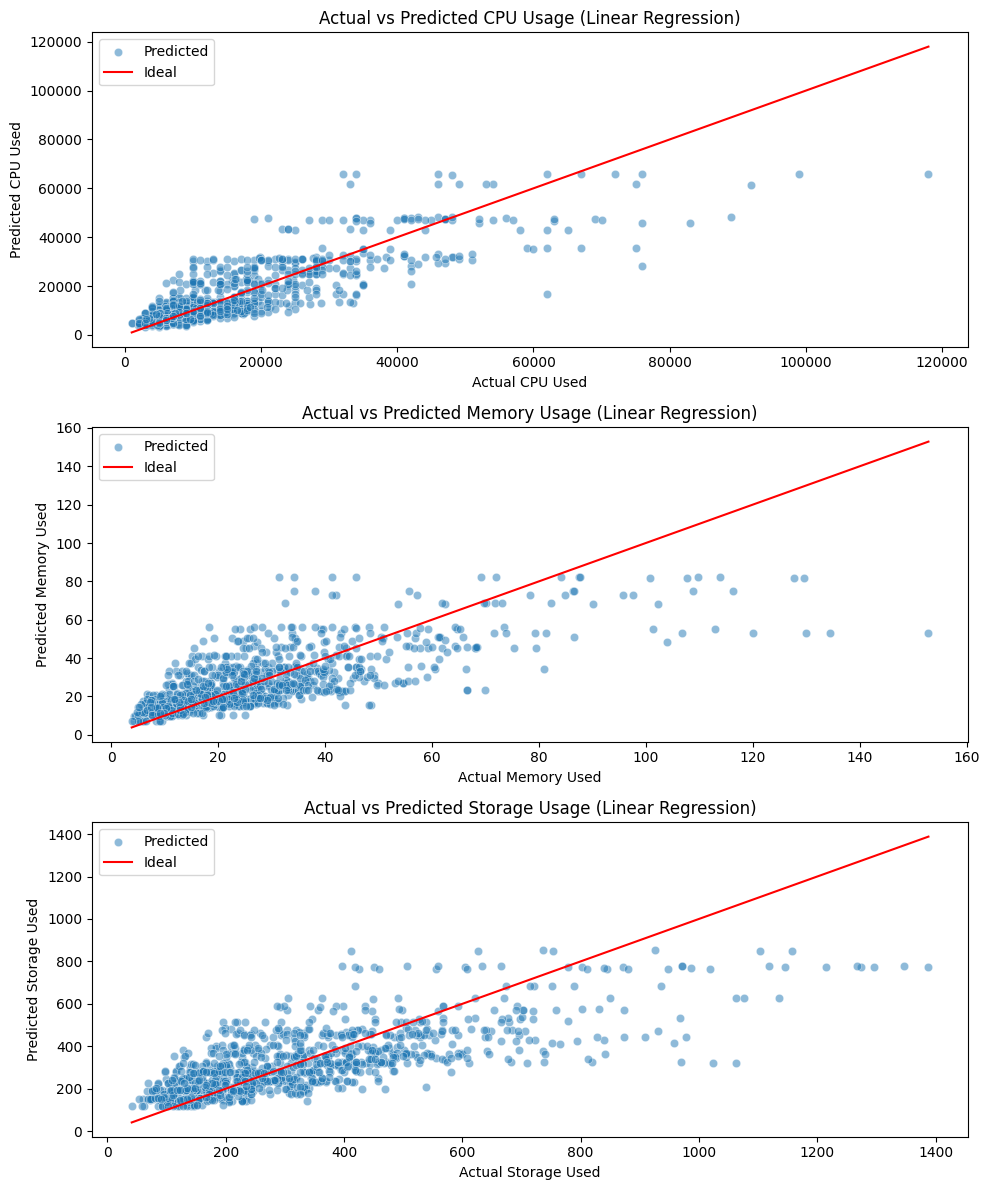


Sample Predictions vs Actual Values (Linear Regression):
   Actual CPU Used  Predicted CPU Used  Actual Memory Used  \
0             5000         9108.500894               17.73   
1             5000         4728.361251               18.44   
2            18000        10745.409642               65.81   
3            30000        30840.443314               42.93   
4             9185        10831.791690               16.49   
5             6755        13445.581822               10.83   
6             6000         5748.590015               13.59   
7             9000         8317.612776               38.50   
8             8000         9076.288723               28.44   
9            21333        11345.908349               14.33   

   Predicted Memory Used  Actual Storage Used  Predicted Storage Used  
0              19.930341                  227              145.779662  
1              26.652437                  274              403.754526  
2              50.920164                  9

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load dataset
file_path = "/home/ashken.edirisinghe/Downloads/Kubernets9_cluster_data.csv"
df = pd.read_csv(file_path)

#  Encode categorical variables (Chart Name)
label_encoder = LabelEncoder()
df["Chart Name Encoded"] = label_encoder.fit_transform(df["Chart Name"])

#  Define features and target variables
X = df[["Chart Name Encoded", "Storage Allocated (GB)", "CPU Allocated", "Memory Allocated (GB)"]]
y_cpu = df["CPU Used"]
y_memory = df["Memory Used (GB)"]
y_storage = df["Storage Used (GB)"]

#  Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_cpu_train, y_cpu_test = train_test_split(X, y_cpu, test_size=0.2, random_state=42)
X_train, X_test, y_memory_train, y_memory_test = train_test_split(X, y_memory, test_size=0.2, random_state=42)
X_train, X_test, y_storage_train, y_storage_test = train_test_split(X, y_storage, test_size=0.2, random_state=42)

#  Train Linear Regression models for CPU, Memory, and Storage prediction
cpu_model_lr = LinearRegression()
memory_model_lr = LinearRegression()
storage_model_lr = LinearRegression()

cpu_model_lr.fit(X_train, y_cpu_train)
memory_model_lr.fit(X_train, y_memory_train)
storage_model_lr.fit(X_train, y_storage_train)

#  Make predictions
cpu_predictions_lr = cpu_model_lr.predict(X_test)
memory_predictions_lr = memory_model_lr.predict(X_test)
storage_predictions_lr = storage_model_lr.predict(X_test)

#  Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "R2 Score": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred))
    }

#  Collect results for Linear Regression
results = []
results.append(evaluate_model(y_cpu_test, cpu_predictions_lr, "Linear Regression - CPU"))
results.append(evaluate_model(y_memory_test, memory_predictions_lr, "Linear Regression - Memory"))
results.append(evaluate_model(y_storage_test, storage_predictions_lr, "Linear Regression - Storage"))

#  Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print("\nLinear Regression Model Performance Comparison:")
print(results_df)

#  Plot actual vs predicted values
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# CPU Prediction Plot
sns.scatterplot(x=y_cpu_test, y=cpu_predictions_lr, alpha=0.5, ax=axes[0], label="Predicted")
axes[0].plot([min(y_cpu_test), max(y_cpu_test)], [min(y_cpu_test), max(y_cpu_test)], color='red', label="Ideal")
axes[0].set_title("Actual vs Predicted CPU Usage (Linear Regression)")
axes[0].set_xlabel("Actual CPU Used")
axes[0].set_ylabel("Predicted CPU Used")
axes[0].legend()

# Memory Prediction Plot
sns.scatterplot(x=y_memory_test, y=memory_predictions_lr, alpha=0.5, ax=axes[1], label="Predicted")
axes[1].plot([min(y_memory_test), max(y_memory_test)], [min(y_memory_test), max(y_memory_test)], color='red', label="Ideal")
axes[1].set_title("Actual vs Predicted Memory Usage (Linear Regression)")
axes[1].set_xlabel("Actual Memory Used")
axes[1].set_ylabel("Predicted Memory Used")
axes[1].legend()

# Storage Prediction Plot
sns.scatterplot(x=y_storage_test, y=storage_predictions_lr, alpha=0.5, ax=axes[2], label="Predicted")
axes[2].plot([min(y_storage_test), max(y_storage_test)], [min(y_storage_test), max(y_storage_test)], color='red', label="Ideal")
axes[2].set_title("Actual vs Predicted Storage Usage (Linear Regression)")
axes[2].set_xlabel("Actual Storage Used")
axes[2].set_ylabel("Predicted Storage Used")
axes[2].legend()

plt.tight_layout()
plt.show()

sample_output_df = pd.DataFrame({
    "Actual CPU Used": y_cpu_test[:10].values,
    "Predicted CPU Used": cpu_predictions_lr[:10],
    "Actual Memory Used": y_memory_test[:10].values,
    "Predicted Memory Used": memory_predictions_lr[:10],
    "Actual Storage Used": y_storage_test[:10].values,
    "Predicted Storage Used": storage_predictions_lr[:10]
})

print("\nSample Predictions vs Actual Values (Linear Regression):")
print(sample_output_df)


Random Forest testing

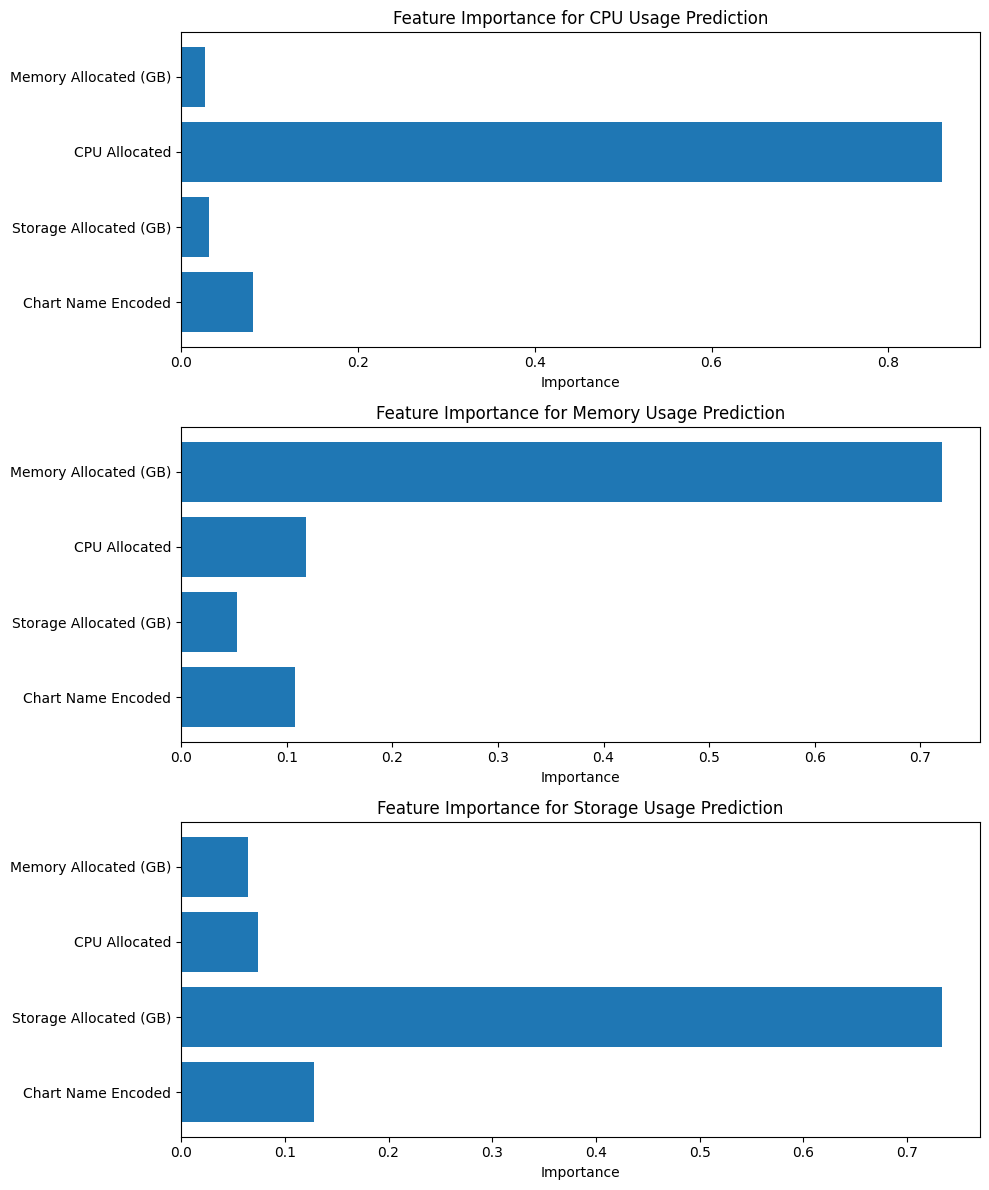

    Chart Name  Storage Allocated (GB)  CPU Allocated  Memory Allocated (GB)  \
0        Kafka                     700          30000                     30   
1       Mlflow                    2000          15000                     30   
2        Redis                    1200           8000                     15   
3  Timescaledb                    1800          12000                     25   
4      Openebs                    2500          20000                     40   

   Chart Name Encoded  Predicted CPU Used  Predicted Memory Used (GB)  \
0                  25         3271.998467                    7.837476   
1                  34         4254.078865                    7.110596   
2                  48         5000.320890                    6.774385   
3                  61         6125.939159                    8.952320   
4                  41         4597.464071                    6.775397   

   Predicted Storage Used (GB)  
0                   167.716821  
1             

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
file_path = "/home/ashken.edirisinghe/Downloads/Kubernets9_cluster_data.csv"
df = pd.read_csv(file_path)

# Encode categorical variables (Chart Name and Team)
label_encoder = LabelEncoder()
df["Chart Name Encoded"] = label_encoder.fit_transform(df["Chart Name"])
df["Team Encoded"] = LabelEncoder().fit_transform(df["Team"])

# Define features and target variables
X = df[["Chart Name Encoded", "Storage Allocated (GB)", "CPU Allocated", "Memory Allocated (GB)"]]
y_cpu = df["CPU Used"]
y_memory = df["Memory Used (GB)"]
y_storage = df["Storage Used (GB)"]

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_cpu_train, y_cpu_test = train_test_split(X, y_cpu, test_size=0.2, random_state=42)
X_train, X_test, y_memory_train, y_memory_test = train_test_split(X, y_memory, test_size=0.2, random_state=42)
X_train, X_test, y_storage_train, y_storage_test = train_test_split(X, y_storage, test_size=0.2, random_state=42)

# Train Random Forest models for CPU, Memory, and Storage prediction
cpu_model = RandomForestRegressor(n_estimators=100, random_state=42)
memory_model = RandomForestRegressor(n_estimators=100, random_state=42)
storage_model = RandomForestRegressor(n_estimators=100, random_state=42)

cpu_model.fit(X_train, y_cpu_train)
memory_model.fit(X_train, y_memory_train)
storage_model.fit(X_train, y_storage_train)

# Evaluate model performance
cpu_predictions = cpu_model.predict(X_test)
memory_predictions = memory_model.predict(X_test)
storage_predictions = storage_model.predict(X_test)

cpu_r2 = r2_score(y_cpu_test, cpu_predictions)
memory_r2 = r2_score(y_memory_test, memory_predictions)
storage_r2 = r2_score(y_storage_test, storage_predictions)

# Check feature importance
cpu_feature_importance = cpu_model.feature_importances_
memory_feature_importance = memory_model.feature_importances_
storage_feature_importance = storage_model.feature_importances_

# Plot feature importance
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
feature_labels = ["Chart Name Encoded", "Storage Allocated (GB)", "CPU Allocated", "Memory Allocated (GB)"]

axes[0].barh(feature_labels, cpu_feature_importance)
axes[0].set_title("Feature Importance for CPU Usage Prediction")
axes[0].set_xlabel("Importance")

axes[1].barh(feature_labels, memory_feature_importance)
axes[1].set_title("Feature Importance for Memory Usage Prediction")
axes[1].set_xlabel("Importance")

axes[2].barh(feature_labels, storage_feature_importance)
axes[2].set_title("Feature Importance for Storage Usage Prediction")
axes[2].set_xlabel("Importance")

plt.tight_layout()
plt.show()

# Sample test cases: (Chart Name, Storage Allocated, CPU Allocated, Memory Allocated)
sample_inputs = [
    ("Kafka", 700, 30000, 30),
    ("Mlflow", 2000, 15000, 30),
    ("Redis", 1200, 8000, 15),
    ("Timescaledb", 1800, 12000, 25),
    ("Openebs", 2500, 20000, 40)
]

sample_df = pd.DataFrame(sample_inputs, columns=["Chart Name", "Storage Allocated (GB)", "CPU Allocated", "Memory Allocated (GB)"])
sample_df["Chart Name Encoded"] = label_encoder.transform(sample_df["Chart Name"])
X_samples = sample_df[["Chart Name Encoded", "Storage Allocated (GB)", "CPU Allocated", "Memory Allocated (GB)"]]

# Predict CPU, Memory, and Storage usage
sample_df["Predicted CPU Used"] = cpu_model.predict(X_samples)
sample_df["Predicted Memory Used (GB)"] = memory_model.predict(X_samples)
sample_df["Predicted Storage Used (GB)"] = storage_model.predict(X_samples)

# Display the predictions
print(sample_df)



Random Forest Model Performance Comparison:
                     Model  R2 Score          MAE           MSE         RMSE
0      Random Forest - CPU  0.723787  4685.913326  5.703428e+07  7552.104364
1   Random Forest - Memory  0.658418     8.219273  1.380983e+02    11.751524
2  Random Forest - Storage  0.651965    89.014418  1.631134e+04   127.715865


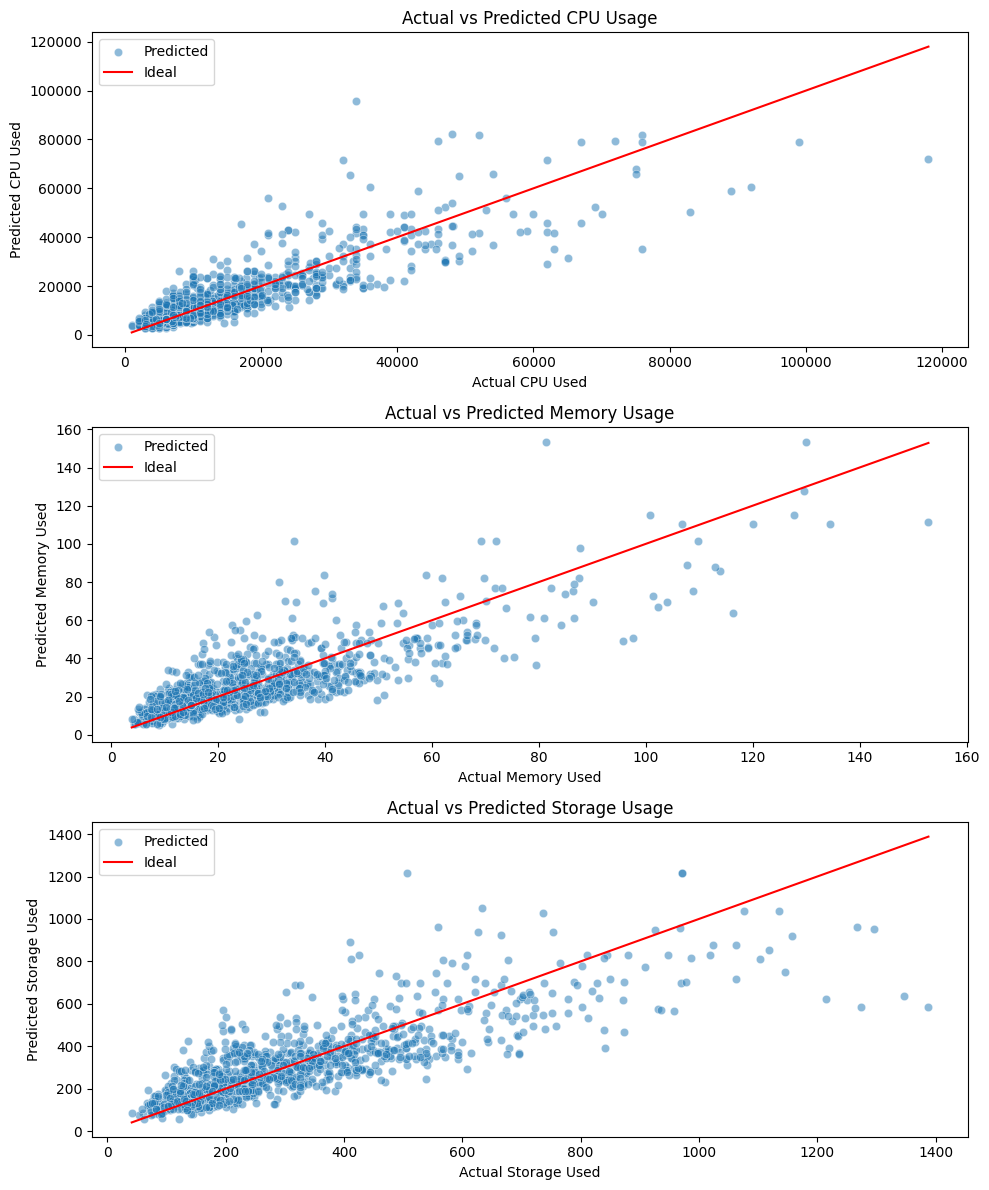


Sample Predictions vs Actual Values:
   Actual CPU Used  Predicted CPU Used  Actual Memory Used  \
0             5000         7409.390693               17.73   
1             5000         5046.480159               18.44   
2            18000        13471.111111               65.81   
3            30000        24555.214286               42.93   
4             9185         9181.143139               16.49   
5             6755        13853.258683               10.83   
6             6000         6480.809524               13.59   
7             9000         5298.119048               38.50   
8             8000         6901.630952               28.44   
9            21333        14473.052429               14.33   

   Predicted Memory Used  Actual Storage Used  Predicted Storage Used  
0              20.073780                  227              225.344028  
1              25.584172                  274              373.872405  
2              60.323964                  931              576.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "R2 Score": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred))
    }

# Collect results for Random Forest models
results = []
results.append(evaluate_model(y_cpu_test, cpu_predictions, "Random Forest - CPU"))
results.append(evaluate_model(y_memory_test, memory_predictions, "Random Forest - Memory"))
results.append(evaluate_model(y_storage_test, storage_predictions, "Random Forest - Storage"))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nRandom Forest Model Performance Comparison:")
print(results_df)

# Plot actual vs predicted values
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# CPU Prediction Plot
sns.scatterplot(x=y_cpu_test, y=cpu_predictions, alpha=0.5, ax=axes[0], label="Predicted")
axes[0].plot([min(y_cpu_test), max(y_cpu_test)], [min(y_cpu_test), max(y_cpu_test)], color='red', label="Ideal")
axes[0].set_title("Actual vs Predicted CPU Usage")
axes[0].set_xlabel("Actual CPU Used")
axes[0].set_ylabel("Predicted CPU Used")
axes[0].legend()

# Memory Prediction Plot
sns.scatterplot(x=y_memory_test, y=memory_predictions, alpha=0.5, ax=axes[1], label="Predicted")
axes[1].plot([min(y_memory_test), max(y_memory_test)], [min(y_memory_test), max(y_memory_test)], color='red', label="Ideal")
axes[1].set_title("Actual vs Predicted Memory Usage")
axes[1].set_xlabel("Actual Memory Used")
axes[1].set_ylabel("Predicted Memory Used")
axes[1].legend()

# Storage Prediction Plot
sns.scatterplot(x=y_storage_test, y=storage_predictions, alpha=0.5, ax=axes[2], label="Predicted")
axes[2].plot([min(y_storage_test), max(y_storage_test)], [min(y_storage_test), max(y_storage_test)], color='red', label="Ideal")
axes[2].set_title("Actual vs Predicted Storage Usage")
axes[2].set_xlabel("Actual Storage Used")
axes[2].set_ylabel("Predicted Storage Used")
axes[2].legend()

plt.tight_layout()
plt.show()

# Print sample actual vs predicted values
sample_output_df = pd.DataFrame({
    "Actual CPU Used": y_cpu_test[:10].values,
    "Predicted CPU Used": cpu_predictions[:10],
    "Actual Memory Used": y_memory_test[:10].values,
    "Predicted Memory Used": memory_predictions[:10],
    "Actual Storage Used": y_storage_test[:10].values,
    "Predicted Storage Used": storage_predictions[:10]
})

print("\nSample Predictions vs Actual Values:")
print(sample_output_df)


Proper XG-Boost testing

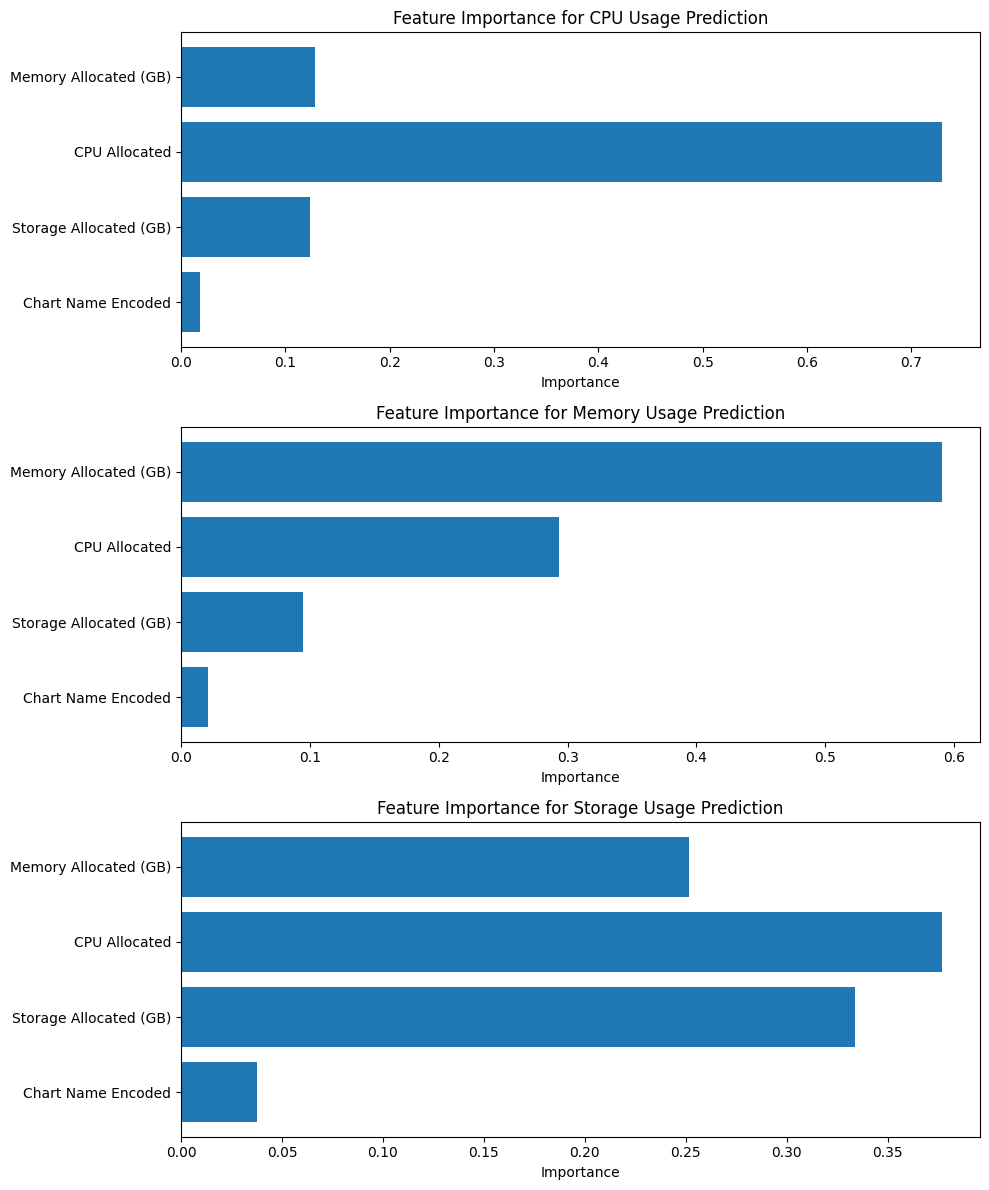

  Chart Name  Storage Allocated (GB)  CPU Allocated  Memory Allocated (GB)  \
0    Airflow                     400          15000                    128   
1     Restic                    2000          15000                     30   
2      Redis                    1200           8000                     15   
3   Yugabyte                    1800          12000                     25   
4    Mongodb                    2500          20000                     40   

   Chart Name Encoded  Predicted CPU Used  Predicted Memory Used (GB)  \
0                   0         6691.611816                   21.776222   
1                  49         3061.554932                   10.434715   
2                  48         7674.134277                   12.578240   
3                  67         3184.434082                    9.366473   
4                  36         4037.425537                   10.517816   

   Predicted Storage Used (GB)  
0                   239.612656  
1                   203.46

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Load the dataset
file_path = "/home/ashken.edirisinghe/Downloads/Kubernets9_cluster_data.csv"
df = pd.read_csv(file_path)

# Encode categorical variables (Chart Name and Team)
label_encoder = LabelEncoder()
df["Chart Name Encoded"] = label_encoder.fit_transform(df["Chart Name"])
df["Team Encoded"] = LabelEncoder().fit_transform(df["Team"])

# Define features and target variables
X = df[["Chart Name Encoded", "Storage Allocated (GB)", "CPU Allocated", "Memory Allocated (GB)"]]
y_cpu = df["CPU Used"]
y_memory = df["Memory Used (GB)"]
y_storage = df["Storage Used (GB)"]

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_cpu_train, y_cpu_test = train_test_split(X, y_cpu, test_size=0.2, random_state=42)
X_train, X_test, y_memory_train, y_memory_test = train_test_split(X, y_memory, test_size=0.2, random_state=42)
X_train, X_test, y_storage_train, y_storage_test = train_test_split(X, y_storage, test_size=0.2, random_state=42)

# Hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

# Perform Grid Search for CPU model
grid_search_cpu = GridSearchCV(XGBRegressor(random_state=42), param_grid, scoring='r2', cv=3, n_jobs=-1)
grid_search_cpu.fit(X_train, y_cpu_train)
cpu_model = grid_search_cpu.best_estimator_

# Perform Grid Search for Memory model
grid_search_memory = GridSearchCV(XGBRegressor(random_state=42), param_grid, scoring='r2', cv=3, n_jobs=-1)
grid_search_memory.fit(X_train, y_memory_train)
memory_model = grid_search_memory.best_estimator_

# Perform Grid Search for Storage model
grid_search_storage = GridSearchCV(XGBRegressor(random_state=42), param_grid, scoring='r2', cv=3, n_jobs=-1)
grid_search_storage.fit(X_train, y_storage_train)
storage_model = grid_search_storage.best_estimator_

# Evaluate model performance
cpu_predictions = cpu_model.predict(X_test)
memory_predictions = memory_model.predict(X_test)
storage_predictions = storage_model.predict(X_test)

cpu_r2 = r2_score(y_cpu_test, cpu_predictions)
memory_r2 = r2_score(y_memory_test, memory_predictions)
storage_r2 = r2_score(y_storage_test, storage_predictions)

# Check feature importance
cpu_feature_importance = cpu_model.feature_importances_
memory_feature_importance = memory_model.feature_importances_
storage_feature_importance = storage_model.feature_importances_

# Plot feature importance
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
feature_labels = ["Chart Name Encoded", "Storage Allocated (GB)", "CPU Allocated", "Memory Allocated (GB)"]

axes[0].barh(feature_labels, cpu_feature_importance)
axes[0].set_title("Feature Importance for CPU Usage Prediction")
axes[0].set_xlabel("Importance")

axes[1].barh(feature_labels, memory_feature_importance)
axes[1].set_title("Feature Importance for Memory Usage Prediction")
axes[1].set_xlabel("Importance")

axes[2].barh(feature_labels, storage_feature_importance)
axes[2].set_title("Feature Importance for Storage Usage Prediction")
axes[2].set_xlabel("Importance")

plt.tight_layout()
plt.show()

# Sample test cases: (Chart Name, Storage Allocated, CPU Allocated, Memory Allocated)
sample_inputs = [
    ("Airflow", 400, 15000, 128),
    ("Restic", 2000, 15000, 30),
    ("Redis", 1200, 8000, 15),
    ("Yugabyte", 1800, 12000, 25),
    ("Mongodb", 2500, 20000, 40)
]

sample_df = pd.DataFrame(sample_inputs, columns=["Chart Name", "Storage Allocated (GB)", "CPU Allocated", "Memory Allocated (GB)"])
sample_df["Chart Name Encoded"] = label_encoder.transform(sample_df["Chart Name"])
X_samples = sample_df[["Chart Name Encoded", "Storage Allocated (GB)", "CPU Allocated", "Memory Allocated (GB)"]]

# Predict CPU, Memory, and Storage usage
sample_df["Predicted CPU Used"] = cpu_model.predict(X_samples)
sample_df["Predicted Memory Used (GB)"] = memory_model.predict(X_samples)
sample_df["Predicted Storage Used (GB)"] = storage_model.predict(X_samples)

# Display the predictions
print(sample_df)


Model Performance Comparison:
               Model  R2 Score          MAE           MSE         RMSE
0      XGBoost - CPU  0.740321  4700.636719  5.362033e+07  7322.590525
1   XGBoost - Memory  0.696109     8.044376  1.228603e+02    11.084237
2  XGBoost - Storage  0.663009    91.467506  1.579374e+04   125.673164


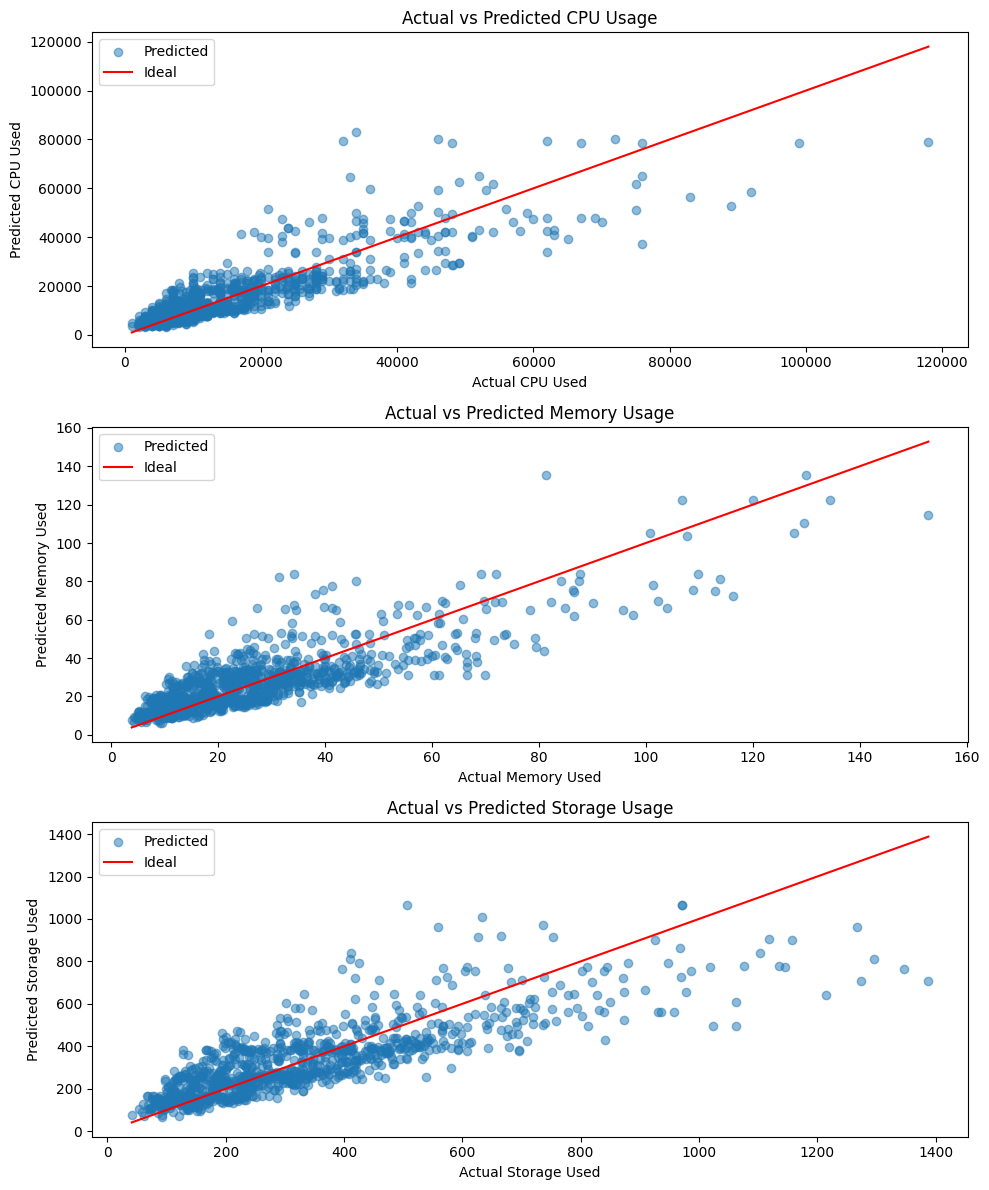

Sample Predictions vs Actual Values:
   Actual CPU Used  Predicted CPU Used  Actual Memory Used  \
0             5000         9964.772461               17.73   
1             5000         5269.434570               18.44   
2            18000        13979.950195               65.81   
3            30000        26291.519531               42.93   
4             9185         9377.327148               16.49   
5             6755        18412.226562               10.83   
6             6000         5470.395020               13.59   
7             9000         7448.921387               38.50   
8             8000         6622.649414               28.44   
9            21333        12559.248047               14.33   

   Predicted Memory Used  Actual Storage Used  Predicted Storage Used  
0              23.846199                  227              186.444122  
1              25.347546                  274              375.550110  
2              60.596107                  931              563.1

In [2]:
#evaluation of XGBOOST


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "R2 Score": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred))
    }

# Collect results for XGBoost models
results = []
results.append(evaluate_model(y_cpu_test, cpu_predictions, "XGBoost - CPU"))
results.append(evaluate_model(y_memory_test, memory_predictions, "XGBoost - Memory"))
results.append(evaluate_model(y_storage_test, storage_predictions, "XGBoost - Storage"))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
print(results_df)

# Plot actual vs predicted values
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
axes[0].scatter(y_cpu_test, cpu_predictions, alpha=0.5, label="Predicted")
axes[0].plot([min(y_cpu_test), max(y_cpu_test)], [min(y_cpu_test), max(y_cpu_test)], color='red', label="Ideal")
axes[0].set_title("Actual vs Predicted CPU Usage")
axes[0].set_xlabel("Actual CPU Used")
axes[0].set_ylabel("Predicted CPU Used")
axes[0].legend()

axes[1].scatter(y_memory_test, memory_predictions, alpha=0.5, label="Predicted")
axes[1].plot([min(y_memory_test), max(y_memory_test)], [min(y_memory_test), max(y_memory_test)], color='red', label="Ideal")
axes[1].set_title("Actual vs Predicted Memory Usage")
axes[1].set_xlabel("Actual Memory Used")
axes[1].set_ylabel("Predicted Memory Used")
axes[1].legend()

axes[2].scatter(y_storage_test, storage_predictions, alpha=0.5, label="Predicted")
axes[2].plot([min(y_storage_test), max(y_storage_test)], [min(y_storage_test), max(y_storage_test)], color='red', label="Ideal")
axes[2].set_title("Actual vs Predicted Storage Usage")
axes[2].set_xlabel("Actual Storage Used")
axes[2].set_ylabel("Predicted Storage Used")
axes[2].legend()

plt.tight_layout()
plt.show()

# Print some sample outputs for actual vs predicted values
sample_output_df = pd.DataFrame({
    "Actual CPU Used": y_cpu_test[:10].values,
    "Predicted CPU Used": cpu_predictions[:10],
    "Actual Memory Used": y_memory_test[:10].values,
    "Predicted Memory Used": memory_predictions[:10],
    "Actual Storage Used": y_storage_test[:10].values,
    "Predicted Storage Used": storage_predictions[:10]
})
print("Sample Predictions vs Actual Values:")
print(sample_output_df)


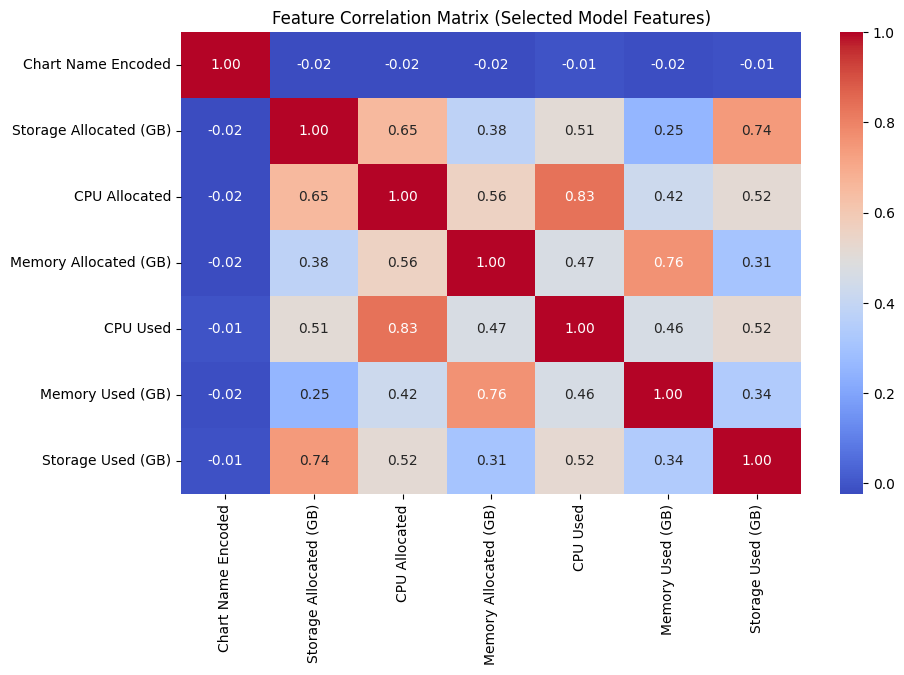

Benchmarking Results for XGBoost:
               Model  R2 Score          MAE           MSE         RMSE  \
0      XGBoost - CPU  0.723842  4672.166992  5.702303e+07  7551.359613   
1   XGBoost - Memory  0.665145     8.134945  1.353786e+02    11.635231   
2  XGBoost - Storage  0.658473    88.842705  1.600630e+04   126.516010   

        MAPE  Median Absolute Error  
0  35.471645            2869.420898  
1  34.319960               5.943513  
2  30.694385              62.187073  


In [ ]:
# Printing the correlation Metrices

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

# Load the dataset
file_path = "/home/ashken.edirisinghe/Downloads/Kubernets9_cluster_data.csv"
df = pd.read_csv(file_path)

# Encode categorical variables (Chart Name and Team)
label_encoder = LabelEncoder()
df["Chart Name Encoded"] = label_encoder.fit_transform(df["Chart Name"])
df["Team Encoded"] = LabelEncoder().fit_transform(df["Team"])

# Define features and target variables
X = df[["Chart Name Encoded", "Storage Allocated (GB)", "CPU Allocated", "Memory Allocated (GB)"]]
y_cpu = df["CPU Used"]
y_memory = df["Memory Used (GB)"]
y_storage = df["Storage Used (GB)"]

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_cpu_train, y_cpu_test = train_test_split(X, y_cpu, test_size=0.2, random_state=42)
X_train, X_test, y_memory_train, y_memory_test = train_test_split(X, y_memory, test_size=0.2, random_state=42)
X_train, X_test, y_storage_train, y_storage_test = train_test_split(X, y_storage, test_size=0.2, random_state=42)

# Function to compute additional benchmarking metrics
def evaluate_model(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "R2 Score": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAPE": np.mean(np.abs((y_true - y_pred) / y_true)) * 100,
        "Median Absolute Error": np.median(np.abs(y_true - y_pred))
    }

# Compute correlation matrix for selected model features
selected_features = ["Chart Name Encoded", "Storage Allocated (GB)", "CPU Allocated", "Memory Allocated (GB)", "CPU Used", "Memory Used (GB)", "Storage Used (GB)"]
correlation_matrix = df[selected_features].corr()

# Plot heatmap for correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix (Selected Model Features)")
plt.show()

# Train and evaluate XGBoost model
cpu_model = XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.1, subsample=0.9, colsample_bytree=0.9, random_state=42)
cpu_model.fit(X_train, y_cpu_train)
cpu_predictions = cpu_model.predict(X_test)

memory_model = XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.1, subsample=0.9, colsample_bytree=0.9, random_state=42)
memory_model.fit(X_train, y_memory_train)
memory_predictions = memory_model.predict(X_test)

storage_model = XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.1, subsample=0.9, colsample_bytree=0.9, random_state=42)
storage_model.fit(X_train, y_storage_train)
storage_predictions = storage_model.predict(X_test)

# Collect results
results = []
results.append(evaluate_model(y_cpu_test, cpu_predictions, "XGBoost - CPU"))
results.append(evaluate_model(y_memory_test, memory_predictions, "XGBoost - Memory"))
results.append(evaluate_model(y_storage_test, storage_predictions, "XGBoost - Storage"))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("Benchmarking Results for XGBoost:")
print(results_df)

# Compute feature importance for XGBoost
cpu_feature_importance = cpu_model.feature_importances_
memory_feature_importance = memory_model.feature_importances_
storage_feature_importance = storage_model.feature_importances_

sample_inputs = [
    ("Airflow", 4000, 30000, 50),
    ("Restic", 2000, 15000, 30),
    ("Redis", 1200, 8000, 15),
    ("Yugabyte", 1800, 12000, 25),
    ("Mongodb", 2500, 20000, 40)
]

sample_df = pd.DataFrame(sample_inputs, columns=["Chart Name", "Storage Allocated (GB)", "CPU Allocated", "Memory Allocated (GB)"])
sample_df["Chart Name Encoded"] = label_encoder.transform(sample_df["Chart Name"])
X_samples = sample_df[["Chart Name Encoded", "Storage Allocated (GB)", "CPU Allocated", "Memory Allocated (GB)"]]



In [38]:
# Saving the trained model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Load the dataset
file_path = "/home/ashken.edirisinghe/Downloads/Kubernets9_cluster_data.csv"
df = pd.read_csv(file_path)

# Encode categorical variables (Chart Name and Team)
label_encoder = LabelEncoder()
df["Chart Name Encoded"] = label_encoder.fit_transform(df["Chart Name"])
df["Team Encoded"] = LabelEncoder().fit_transform(df["Team"])

# Save the label encoder
joblib.dump(label_encoder, "label_encoder1.pkl")

# Define features and target variables
X = df[["Chart Name Encoded", "Storage Allocated (GB)", "CPU Allocated", "Memory Allocated (GB)"]]
y_cpu = df["CPU Used"]
y_memory = df["Memory Used (GB)"]
y_storage = df["Storage Used (GB)"]

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_cpu_train, y_cpu_test = train_test_split(X, y_cpu, test_size=0.2, random_state=42)
X_train, X_test, y_memory_train, y_memory_test = train_test_split(X, y_memory, test_size=0.2, random_state=42)
X_train, X_test, y_storage_train, y_storage_test = train_test_split(X, y_storage, test_size=0.2, random_state=42)

# Hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

# Perform Grid Search for CPU model
grid_search_cpu = GridSearchCV(XGBRegressor(random_state=42), param_grid, scoring='r2', cv=3, n_jobs=-1)
grid_search_cpu.fit(X_train, y_cpu_train)
cpu_model = grid_search_cpu.best_estimator_
joblib.dump(cpu_model, "cpu_model1.pkl")

# Perform Grid Search for Memory model
grid_search_memory = GridSearchCV(XGBRegressor(random_state=42), param_grid, scoring='r2', cv=3, n_jobs=-1)
grid_search_memory.fit(X_train, y_memory_train)
memory_model = grid_search_memory.best_estimator_
joblib.dump(memory_model, "memory_model1.pkl")

# Perform Grid Search for Storage model
grid_search_storage = GridSearchCV(XGBRegressor(random_state=42), param_grid, scoring='r2', cv=3, n_jobs=-1)
grid_search_storage.fit(X_train, y_storage_train)
storage_model = grid_search_storage.best_estimator_
joblib.dump(storage_model, "storage_model1.pkl")

print("Models and label encoder saved for real-time predictions.")


Models and label encoder saved for real-time predictions.


In [45]:
import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import IsolationForest

# Load saved models and label encoder
cpu_model = joblib.load("/home/ashken.edirisinghe/Downloads/cpu_model1.pkl")
memory_model = joblib.load("/home/ashken.edirisinghe/Downloads/memory_model1.pkl")
storage_model = joblib.load("/home/ashken.edirisinghe/Downloads/storage_model1.pkl")
label_encoder = joblib.load("/home/ashken.edirisinghe/Downloads/label_encoder.pkl")

# Load dataset for training anomaly detection model
file_path = "/home/ashken.edirisinghe/Downloads/updated_dataset_with_adjusted_cpu_values.csv"
df = pd.read_csv(file_path)

# Train Isolation Forest on past resource usage
target_features = ["CPU Used", "Memory Used (GB)", "Storage Used (GB)"]
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(df[target_features])

# Define minimum recommended resource allocations
MIN_CPU = 1500 
MIN_MEMORY = 20 
MIN_STORAGE = 600  

# User input for real-time predictions
chart_name = input("Enter Chart Name: ")
storage_allocated = float(input("Enter Storage Allocated (GB): "))
cpu_allocated = float(input("Enter CPU Allocated: "))
memory_allocated = float(input("Enter Memory Allocated (GB): "))

# Check if resource allocations are too low
if cpu_allocated < MIN_CPU or memory_allocated < MIN_MEMORY or storage_allocated < MIN_STORAGE:
    print("\n **Unfortunately, no possible recommendation due to low resource allocations.**")
    print(" Chart metadata and company-level policies require minimum CPU, , and Storage values.")
    print(f"🔹 **Minimum Recommended Resources:** CPU={MIN_CPU}, Memory={MIN_MEMORY} GB, Storage={MIN_STORAGE} GB")
else:
    # Encode chart name
    chart_encoded = label_encoder.transform([chart_name])[0]

    # Prepare input for model prediction
    X_input = np.array([[chart_encoded, storage_allocated, cpu_allocated, memory_allocated]])

    # Predict resource usage
    predicted_cpu = cpu_model.predict(X_input)[0]
    predicted_memory = memory_model.predict(X_input)[0]
    predicted_storage = storage_model.predict(X_input)[0]

    print(f"\n **Predicted Resource Usage for {chart_name}:**")
    print(f"Recommended CPU Request: {predicted_cpu}")
    print(f"Recommended Memory Request(GB): {predicted_memory}")
    print(f"Recommended persistance (GB): {predicted_storage}")

    # Check if the prediction is an anomaly
    def check_anomaly(cpu, memory, storage):
        anomaly_label = iso_forest.predict([[cpu, memory, storage]])[0]
        return anomaly_label == -1  # Returns True if it is an anomaly

    # Run anomaly detection
    if check_anomaly(predicted_cpu, predicted_memory, predicted_storage):
        print("\n **Anomaly detected! Checking past deployments for auto-scaling recommendations...**")
    else:
        print(" **Predicted resource usage is within normal range. Proceeding with deployment.**")



 **Predicted Resource Usage for Redis:**
Recommended CPU Request: 25764.44140625
Recommended Memory Request(GB): 30.361618041992188
Recommended persistance (GB): 518.7028198242188
 **Predicted resource usage is within normal range. Proceeding with deployment.**


/home/ashken.edirisinghe/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


RF Testing

/home/ashken.edirisinghe/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ashken.edirisinghe/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ashken.edirisinghe/.local/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/ashken.edirisinghe/.local/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_p

Random Forest (Tuned) Performance Comparison:
                     Model  R2 Score          MAE           MSE         RMSE
0      Random Forest - CPU  0.732896  4659.885654  5.515345e+07  7426.537134
1   Random Forest - Memory  0.680281     8.087685  1.292595e+02    11.369235
2  Random Forest - Storage  0.655927    90.937673  1.612563e+04   126.986731


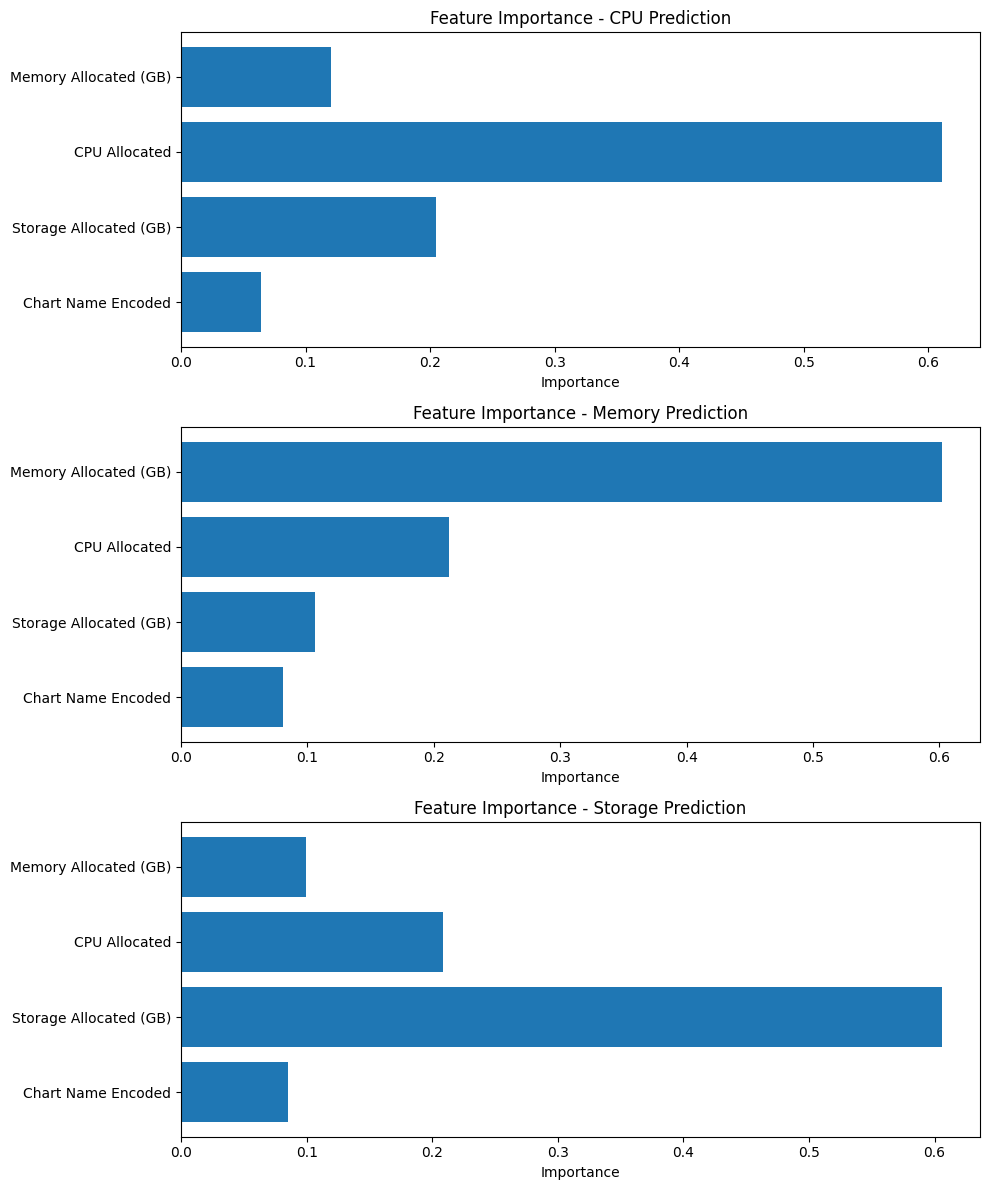


Sample Predictions:
    Chart Name  Storage Allocated (GB)  CPU Allocated  Memory Allocated (GB)  \
0        Kafka                     700          30000                     30   
1       Mlflow                    2000          15000                     30   
2        Redis                    1200           8000                     15   
3  Timescaledb                    1800          12000                     25   
4      Openebs                    2500          20000                     40   

   Chart Name Encoded  Predicted CPU Used  Predicted Memory Used (GB)  \
0                  25         4890.740957                   15.004323   
1                  34         4792.530766                   12.891914   
2                  48         5484.989988                   13.860166   
3                  61         5694.496513                   13.559124   
4                  41         4935.831205                   12.017402   

   Predicted Storage Used (GB)  
0                   146.93

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the dataset
file_path = "/home/ashken.edirisinghe/Downloads/Kubernets9_cluster_data.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
df["Chart Name Encoded"] = label_encoder.fit_transform(df["Chart Name"])
df["Team Encoded"] = LabelEncoder().fit_transform(df["Team"])

# Define features and targets
X = df[["Chart Name Encoded", "Storage Allocated (GB)", "CPU Allocated", "Memory Allocated (GB)"]]
y_cpu = df["CPU Used"]
y_memory = df["Memory Used (GB)"]
y_storage = df["Storage Used (GB)"]

# Train-test split
X_train, X_test, y_cpu_train, y_cpu_test = train_test_split(X, y_cpu, test_size=0.2, random_state=42)
X_train, X_test, y_memory_train, y_memory_test = train_test_split(X, y_memory, test_size=0.2, random_state=42)
X_train, X_test, y_storage_train, y_storage_test = train_test_split(X, y_storage, test_size=0.2, random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Grid Search for CPU model
grid_cpu = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_cpu.fit(X_train, y_cpu_train)
cpu_model = grid_cpu.best_estimator_

# Grid Search for Memory model
grid_memory = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_memory.fit(X_train, y_memory_train)
memory_model = grid_memory.best_estimator_

# Grid Search for Storage model
grid_storage = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_storage.fit(X_train, y_storage_train)
storage_model = grid_storage.best_estimator_

# Evaluate model performance
cpu_predictions = cpu_model.predict(X_test)
memory_predictions = memory_model.predict(X_test)
storage_predictions = storage_model.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "R2 Score": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred))
    }

# Results summary
results = [
    evaluate_model(y_cpu_test, cpu_predictions, "Random Forest - CPU"),
    evaluate_model(y_memory_test, memory_predictions, "Random Forest - Memory"),
    evaluate_model(y_storage_test, storage_predictions, "Random Forest - Storage")
]
results_df = pd.DataFrame(results)
print("Random Forest (Tuned) Performance Comparison:")
print(results_df)

# Plot feature importance
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
feature_labels = ["Chart Name Encoded", "Storage Allocated (GB)", "CPU Allocated", "Memory Allocated (GB)"]

axes[0].barh(feature_labels, cpu_model.feature_importances_)
axes[0].set_title("Feature Importance - CPU Prediction")
axes[0].set_xlabel("Importance")

axes[1].barh(feature_labels, memory_model.feature_importances_)
axes[1].set_title("Feature Importance - Memory Prediction")
axes[1].set_xlabel("Importance")

axes[2].barh(feature_labels, storage_model.feature_importances_)
axes[2].set_title("Feature Importance - Storage Prediction")
axes[2].set_xlabel("Importance")

plt.tight_layout()
plt.show()

# Sample test predictions
sample_inputs = [
    ("Kafka", 700, 30000, 30),
    ("Mlflow", 2000, 15000, 30),
    ("Redis", 1200, 8000, 15),
    ("Timescaledb", 1800, 12000, 25),
    ("Openebs", 2500, 20000, 40)
]

sample_df = pd.DataFrame(sample_inputs, columns=["Chart Name", "Storage Allocated (GB)", "CPU Allocated", "Memory Allocated (GB)"])
sample_df["Chart Name Encoded"] = label_encoder.transform(sample_df["Chart Name"])
X_samples = sample_df[["Chart Name Encoded", "Storage Allocated (GB)", "CPU Allocated", "Memory Allocated (GB)"]]

sample_df["Predicted CPU Used"] = cpu_model.predict(X_samples)
sample_df["Predicted Memory Used (GB)"] = memory_model.predict(X_samples)
sample_df["Predicted Storage Used (GB)"] = storage_model.predict(X_samples)

print("\nSample Predictions:")
print(sample_df)
